In [1]:
pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 4.8 MB/s 
     |████████████████████████████████| 3.1 MB 19.7 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.11-py3-none-any.whl size=9074 sha256=c650fa023ab2f772f50bfbf5d50497ff7eeaebcd55a6b74e2a47622a1179d403
  Stored in directory: /root/.cache/pip/wheels/7d/e4/0c/0c83f70bd0b99ce8aea47a21f8e52502169e7dd17808d12f30
Successfully built python-igraph


In [2]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [3]:
k_top10=pd.read_csv("score_karate1.csv")
G= nx.read_edgelist("karate.txt", nodetype = int)

In [4]:
k_top10

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,DC,CC,EC,BC,TOPSIS,k_means,k_means avec score
0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,33,33,33,33,33,33,28
2,2,2,2,32,32,32,32,32,32,0
3,3,3,3,2,2,2,2,2,2,3
4,4,4,4,1,31,31,31,31,31,0
5,5,5,5,8,1,1,1,1,1,10
6,6,6,6,13,8,8,8,8,8,0
7,7,7,7,23,13,13,13,13,3,28
8,8,8,8,9,3,3,19,3,27,29
9,9,9,9,22,19,30,27,19,12,23


In [6]:
k_top10["k_means with score"]=k_top10["k_means avec score"]
k_top10

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,DC,CC,EC,BC,TOPSIS,k_means,k_means avec score,k_means with score
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,33,33,33,33,33,33,28,28
2,2,2,2,32,32,32,32,32,32,0,0
3,3,3,3,2,2,2,2,2,2,3,3
4,4,4,4,1,31,31,31,31,31,0,0
5,5,5,5,8,1,1,1,1,1,10,10
6,6,6,6,13,8,8,8,8,8,0,0
7,7,7,7,23,13,13,13,13,3,28,28
8,8,8,8,9,3,3,19,3,27,29,29
9,9,9,9,22,19,30,27,19,12,23,23


In [7]:

def si_model(measure):
    top=set(k_top10[measure].values.tolist())
    model = ep.SIModel(G)
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta',1)
    cfg.add_model_initial_configuration("Infected", top)
    model.set_initial_status(cfg)
    iterations = model.iteration_bunch(6)
    S=[]
    I=[]
    it=[]
    for t in iterations:
        S.append(t['node_count'][0])
        I.append(t['node_count'][1])
        it.append(t['iteration'])
        if t['node_count'][1]==4039:
            break
    row=[it,I,S]
    return(row)


In [8]:
DC=[]
CC=[]
BC=[]
EC=[]
TOPSIS=[]
KMEANS=[]
KMEANS2=[]
#for i in r
DC.append(si_model('DC'))
CC.append(si_model('CC'))
BC.append(si_model('BC'))
EC.append(si_model('EC'))
TOPSIS.append(si_model('TOPSIS'))
KMEANS.append(si_model('k_means'))
KMEANS2.append(si_model('k_means avec score'))

In [9]:
DC

[[[0, 1, 2, 3, 4, 5], [10, 31, 35, 35, 35, 35], [25, 4, 0, 0, 0, 0]]]

In [10]:
def Std_mean(lis):
    dc={}
    for i in range(1):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]]=[]

    for i in range(1):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]].append(lis[i][1][j])
    return dc


In [11]:
stdsDC=[]
meansDC=[]
dc=Std_mean(DC)
for i in dc:
    stdsDC.append(np.std(dc[i]))
    meansDC.append(np.mean(dc[i]))


In [12]:
dc

{0: [10], 1: [31], 2: [35], 3: [35], 4: [35], 5: [35]}

In [13]:
stdsCC=[]
meansCC=[]
d=Std_mean(CC)
for i in d:
    stdsCC.append(np.std(d[i]))
    meansCC.append(np.mean(d[i]))

stdsEC=[]
meansEC=[]
d=Std_mean(EC)
for i in d:
    stdsEC.append(np.std(d[i]))
    meansEC.append(np.mean(d[i]))

stdsBC=[]
meansBC=[]
d=Std_mean(BC)
for i in d:
    stdsBC.append(np.std(d[i]))
    meansBC.append(np.mean(d[i]))

stdsTOPSIS=[]
meansTOPSIS=[]
d=Std_mean(TOPSIS)
for i in d:
    stdsTOPSIS.append(np.std(d[i]))
    meansTOPSIS.append(np.mean(d[i]))

dc=Std_mean(DC)
cc=Std_mean(CC)
ec=Std_mean(EC)
bc=Std_mean(BC)
topsis=Std_mean(TOPSIS)




In [14]:
stdsKMEANS=[]
meansKMEANS=[]
d=Std_mean(KMEANS)
for i in d:
    stdsKMEANS.append(np.std(d[i]))
    meansKMEANS.append(np.mean(d[i]))
    
    

In [15]:
stdsKMEANS2=[]
meansKMEANS2=[]
d=Std_mean(KMEANS2)
for i in d:
    stdsKMEANS2.append(np.std(d[i]))
    meansKMEANS2.append(np.mean(d[i]))
    

In [16]:
dc=Std_mean(DC)
cc=Std_mean(CC)
ec=Std_mean(EC)
bc=Std_mean(BC)
topsis=Std_mean(TOPSIS)
kmeans=Std_mean(KMEANS)
kmeans2=Std_mean(KMEANS2)

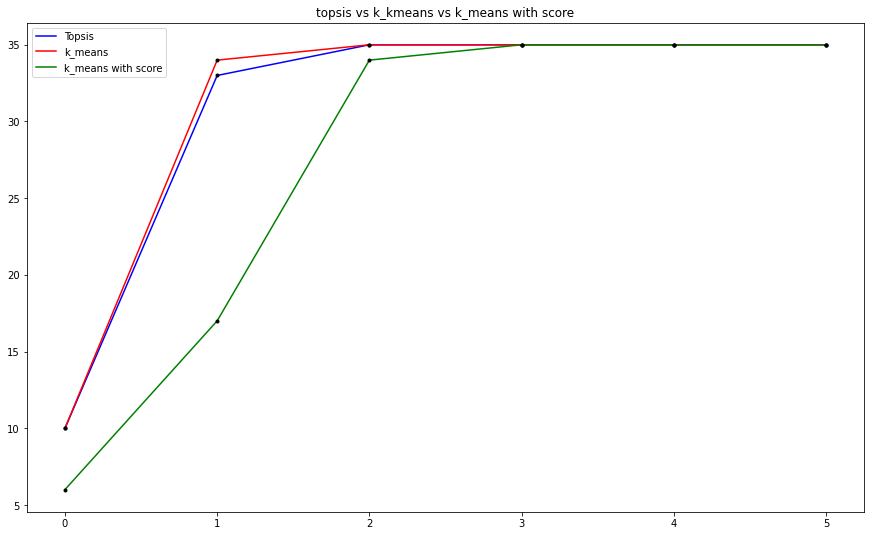

In [17]:
fig = plt.subplots(figsize=(15, 9))

plt.plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
plt.errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
plt.plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
plt.errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
plt.plot(sorted(kmeans2.keys()) , meansKMEANS2, label='k_means with score',c='green')
plt.errorbar(sorted(kmeans2.keys()) , meansKMEANS2, yerr=stdsKMEANS2, fmt ='.k')
plt.title('topsis vs k_kmeans vs k_means with score')

plt.legend()